In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [14]:
#reading in the data via an csv file
df = pd.read_csv('insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [11]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [20]:
df['sex'].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

In [39]:
def insurance(data = 'insurance.csv'):
    
    df = pd.read_csv(data)

    numerical = df.select_dtypes(include='number').columns.tolist()
    categorical = df.select_dtypes(exclude='number').columns.tolist()
    to_encode = ('sex', 'smoker')
    
    categorical = [col for col in categorical if col not in to_encode]

    for cat in to_encode:
        df[f'{cat}_encoded'] = df[cat].apply(lambda x: 0 if x in ['no', 'female'] else 1)
    
    dummies_df = pd.get_dummies(df['region'], drop_first=False, dtype='int')

    df = pd.concat([df,dummies_df], axis = 1)


    return df


def data_split(df):

    seed = 1722
    
    train, test= train_test_split(df, test_size= .3, random_state = seed)
    validate, test = train_test_split(test, test_size = 0.5, random_state = seed)

    return train, validate, test


In [21]:
insurance()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,0,1


In [41]:
train, validate, test = data_split(df)
train.shape, validate.shape, test.shape

((936, 7), (201, 7), (201, 7))

<Axes: xlabel='charges'>

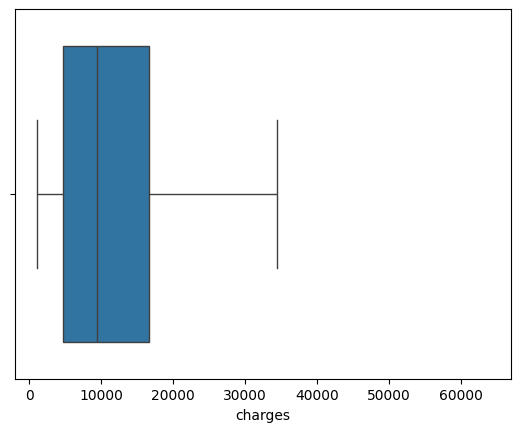

In [28]:
sns.boxplot(data = df['charges'], orient='h',fliersize=False)

<Axes: xlabel='charges', ylabel='Count'>

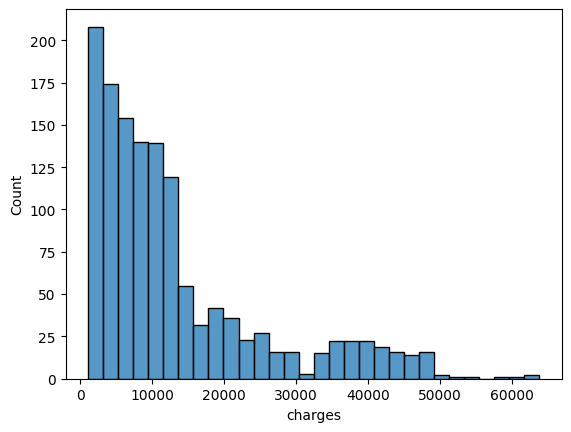

In [35]:
sns.histplot(data = df['charges'])

#### Our target variable is heavily right skewed. Will transformer with LOG for modeling 